## Forest Fires in Brazil

#### Dataset link: https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('amazon.csv', encoding = "iso-8859-1",parse_dates=['date'])

In [9]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

#### Display Top 5 Rows of The Dataset

In [12]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


#### Check Last 5 Rows

In [11]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


#### Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [13]:
data.shape

(6454, 5)

#### Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


#### Check For Duplicate Data and Drop Them

In [17]:
duplicated_data = data.duplicated().any()
duplicated_data

True

In [18]:
data = data.drop_duplicates()

In [19]:
data.shape

(6422, 5)

#### Check Null Values In The Dataset

In [21]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

#### Get Overall Statistics About The Dataframe

In [22]:
data.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


#### Rename Month Names To English

In [23]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [24]:
data['month_new'] = data['month'].map({'Janeiro':'jan',
                                       'Fevereiro':'feb',
                                       'Março':'mar',
                                       'Abril':'abril',
                                       'Maio':'may',
                                       'Junho':'jun',
                                       'julho':'jul',
                                       'Agosto':'august',
                                       'Setembro':'sep',
                                       'Outubro':'oct',
                                       'Novembro':'nov',
                                       'Dezembro':'dec'
                                       })
                                        


In [25]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


#### Total Number of Fires Registered

In [28]:
data['number'].value_counts().sum()

6422

#### In Which Month Maximum Number of Forest Fires Were Reported?

In [33]:
data1 = data.groupby('month_new')['number'].sum().sort_values(ascending = True).reset_index()
data1

,month_new,number
0,abril,28184.770
1,mar,30709.405
2,feb,30839.050
3,may,34725.363
4,jan,47681.844
5,jun,55997.675
6,dec,57535.480
7,sep,58578.305
8,nov,85508.054
9,august,88050.435


<AxesSubplot:xlabel='month_new', ylabel='number'>

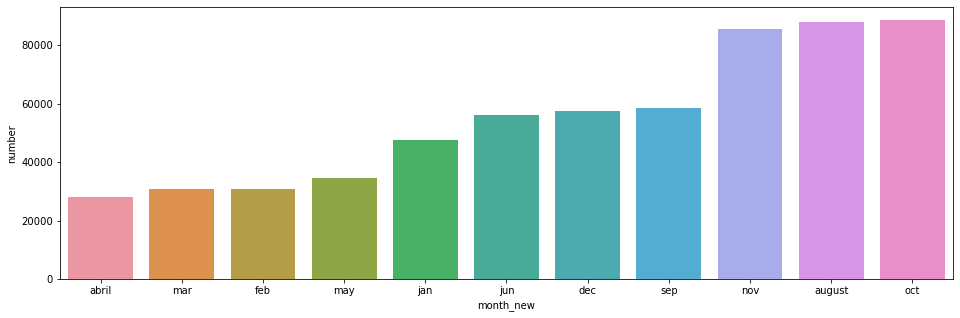

In [38]:
plt.figure(figsize=(16,5))
sns.barplot(x = 'month_new', y = 'number', data = data1)

#### In Which Year Maximum Number of Forest Fires Was Reported?

In [40]:
data2 = data.groupby('year')['number'].sum().sort_values(ascending = True).reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2008,29378.964
5,2007,33028.413
6,2006,33824.161
7,2011,34633.545
8,2005,35004.965
9,2013,35137.118


<AxesSubplot:xlabel='year', ylabel='number'>

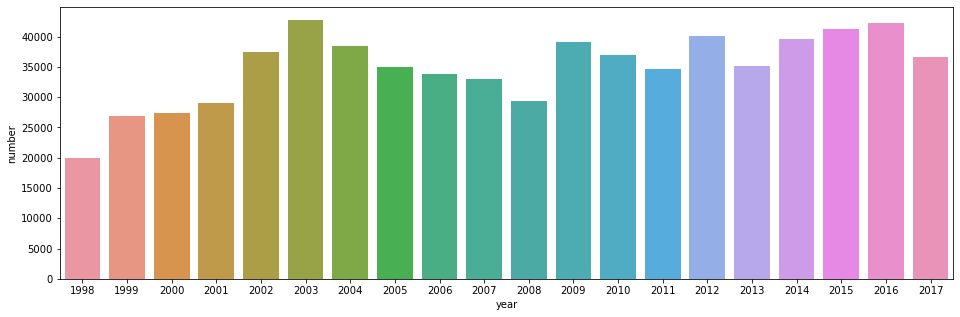

In [41]:
plt.figure(figsize=(16,5))
sns.barplot(x = 'year', y = 'number', data = data2)

#### In Which State Maximum Number of Forest Fires Was Reported?

In [43]:
data3 = data.groupby('state')['number'].sum().sort_values(ascending = True).reset_index()
data3

,state,number
0,Sergipe,3237.000
1,Distrito Federal,3561.000
2,Alagoas,4606.000
3,Espirito Santo,6546.000
4,Acre,18464.030
5,Rondonia,20285.429
6,Amapa,21831.576
7,Santa Catarina,24359.852
8,Roraima,24385.074
9,Pernambuco,24498.000


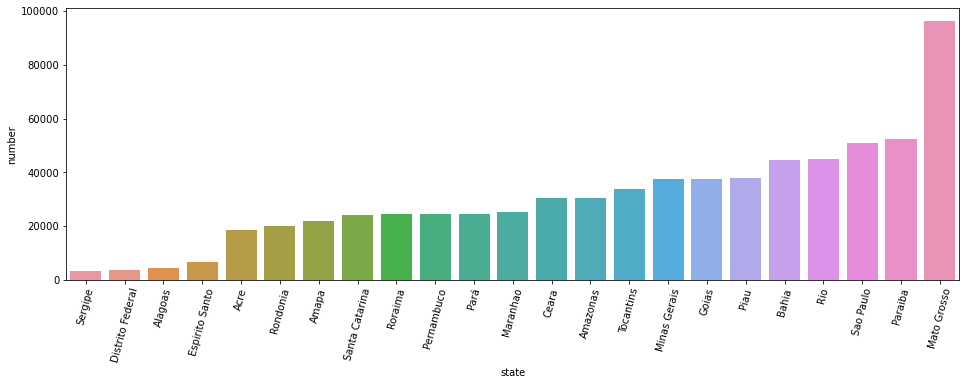

In [46]:
plt.figure(figsize=(16,5))
sns.barplot(x = 'state', y = 'number', data = data3)
plt.xticks(rotation=75)
plt.show()

#### Find Total Number of Fires Were Reported In Amazonas

In [51]:
data[data['state']=='Amazonas']['number'].sum()

30650.129

#### Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [56]:
data4 = data[data['state']=='Amazonas']
data5 = data4.groupby('year')['number'].sum()
data5

year
1998     946.000
1999    1061.000
2000     853.000
2001    1297.000
2002    2852.000
2003    1524.268
2004    2298.207
2005    1657.128
2006     997.640
2007     589.601
2008    2717.000
2009    1320.601
2010    2324.508
2011    1652.538
2012    1110.641
2013     905.217
2014    2385.909
2015    1189.994
2016    2060.972
2017     906.905
Name: number, dtype: float64